# **1 LAB**

In [1]:
import pandas as pd # для работы с данными: объектами, признаками, результатами
import numpy as np # для работы с матрицами и многомерными массивами
import seaborn as sns # визуализация
import matplotlib.pyplot as plt # визуализация

In [2]:
data = pd.read_csv('winequality-red.csv') # читаем данные сета из comma-separated file

In [3]:
data.head(15) # вывод некоторого количества строк данных 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
data.info() # вывод данных по признакам 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print(data.shape) # размер датасета всего (строки, столбцы)

data.drop_duplicates(inplace=True) # удалене повторяющихся строк (inplace - удалить дубликаты в самом образце или вернуть копию с удаленными)
 # data.drop([ '__' ], axis = 'columns') - удалениие признаков, если не нужны
data.shape # были удалены 240 повторяющихся строк

(1599, 12)


(1359, 12)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.iloc[:,-1].unique() # получение уникальных значений последнего столбца (признака качества вина)

array([5, 6, 7, 4, 8, 3])

In [8]:
data['quality'].value_counts() # количество каждой из "оценок качества вина" в датасете, соответственно оценка 5 встретилась 681 раз ...

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [9]:
data.isnull().sum() # пропущенных значений нет

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2) # смотрим на корреляцию признаков / точность отображения значений - .set_precision()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.14,-0.10,0.67,-0.69,0.19,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,-0.00,0.06,-0.02,0.07,0.02,0.25,-0.26,-0.20,-0.40
citric acid,0.67,-0.55,1.00,0.14,0.21,-0.05,0.05,0.36,-0.55,0.33,0.11,0.23
residual sugar,0.11,-0.00,0.14,1.00,0.03,0.16,0.20,0.32,-0.08,-0.01,0.06,0.01
chlorides,0.09,0.06,0.21,0.03,1.00,0.00,0.05,0.19,-0.27,0.39,-0.22,-0.13
free sulfur dioxide,-0.14,-0.02,-0.05,0.16,0.00,1.00,0.67,-0.02,0.06,0.05,-0.08,-0.05
total sulfur dioxide,-0.10,0.07,0.05,0.20,0.05,0.67,1.00,0.08,-0.08,0.04,-0.22,-0.18
density,0.67,0.02,0.36,0.32,0.19,-0.02,0.08,1.00,-0.36,0.15,-0.50,-0.18
pH,-0.69,0.25,-0.55,-0.08,-0.27,0.06,-0.08,-0.36,1.00,-0.21,0.21,-0.06
sulphates,0.19,-0.26,0.33,-0.01,0.39,0.05,0.04,0.15,-0.21,1.00,0.09,0.25


Рассмотрим признаки с коррелирующим коэффициентом выше 0.65

In [11]:
corr = data.corr().abs()

In [12]:
ncorr = corr.copy()
# массив коррелирующих признаков для удаления
toDel = []

for row in ncorr.index:
    for column in ncorr[row].index: 
        if ncorr[row][column] >= 0.65 and ncorr[row][column] != 1: 
            if not row in toDel:
              toDel.append(column)
            ncorr[row][column] = '*'
        else:
            ncorr[row][column] = ' '
ncorr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(in

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,,,*,,,,,*,*,,,
volatile acidity,,,,,,,,,,,,
citric acid,*,,,,,,,,,,,
residual sugar,,,,,,,,,,,,
chlorides,,,,,,,,,,,,
free sulfur dioxide,,,,,,,*,,,,,
total sulfur dioxide,,,,,,*,,,,,,
density,*,,,,,,,,,,,
pH,*,,,,,,,,,,,
sulphates,,,,,,,,,,,,


In [13]:
print('Коррелирующие признаки: ', toDel)

Коррелирующие признаки:  ['citric acid', 'density', 'pH', 'total sulfur dioxide']


In [14]:
# датасет без коррелирующих признаков
cleared = data.drop(toDel, axis = 1) # axis = 1 - удаляем столбцы
cleared.head(15)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,0.56,9.4,5
1,7.8,0.880,2.6,0.098,25.0,0.68,9.8,5
2,7.8,0.760,2.3,0.092,15.0,0.65,9.8,5
3,11.2,0.280,1.9,0.075,17.0,0.58,9.8,6
5,7.4,0.660,1.8,0.075,13.0,0.56,9.4,5
6,7.9,0.600,1.6,0.069,15.0,0.46,9.4,5
7,7.3,0.650,1.2,0.065,15.0,0.47,10.0,7
8,7.8,0.580,2.0,0.073,9.0,0.57,9.5,7
9,7.5,0.500,6.1,0.071,17.0,0.80,10.5,5
10,6.7,0.580,1.8,0.097,15.0,0.54,9.2,5


In [15]:
# разделяем датасет, выделяем таргет пизнаки (которые стремимся научиться определять) и остальные
train_matrix = cleared[cleared.columns[:-1]] # признаки
target = cleared[cleared.columns[-1]] # таргетированный признак (качество вина)


In [16]:
target # набор таргет признаков

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [17]:
train_matrix # набор остальных признаков

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol
0,7.4,0.700,1.9,0.076,11.0,0.56,9.4
1,7.8,0.880,2.6,0.098,25.0,0.68,9.8
2,7.8,0.760,2.3,0.092,15.0,0.65,9.8
3,11.2,0.280,1.9,0.075,17.0,0.58,9.8
5,7.4,0.660,1.8,0.075,13.0,0.56,9.4
...,...,...,...,...,...,...,...
1593,6.8,0.620,1.9,0.068,28.0,0.82,9.5
1594,6.2,0.600,2.0,0.090,32.0,0.58,10.5
1595,5.9,0.550,2.2,0.062,39.0,0.76,11.2
1597,5.9,0.645,2.0,0.075,32.0,0.71,10.2


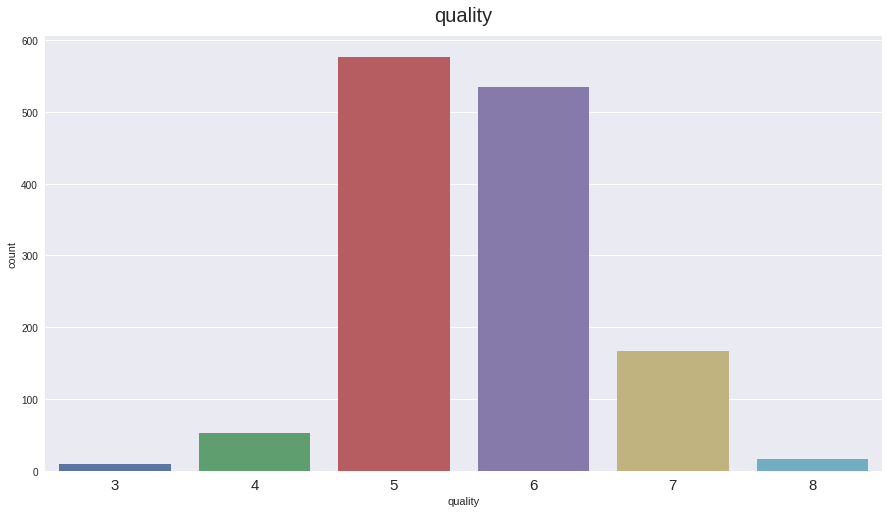

In [18]:
# визуализировали частоту распределения таргетированного признака качество
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
plt.title("quality", fontsize=20, y=1.02)
sns.countplot(x = cleared["quality"])
plt.xticks(fontsize=15)
plt.show()

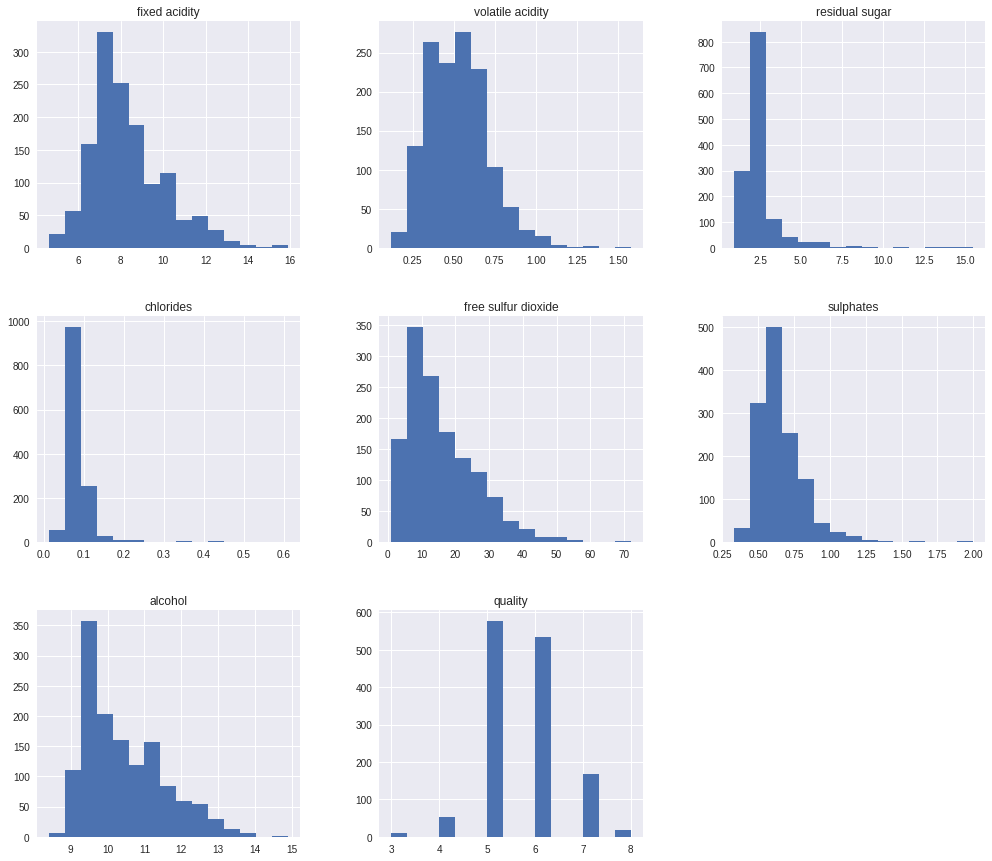

In [20]:
# визуализировали встречаемость всех признаков
cleared.hist(figsize=(17,15), bins=15);

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
# разделили наборы таргет признаков и остальных на 2 выборки (20% - для валидации 80% - обучение) random_state - перемешивание данных перед разделением 
# (результаты воспроизводим, seed = 42 (самые популярные сиды согласно документации библиотеки - 0 и 42))
x_train1, x_test1, y_train1, y_test1 = train_test_split(train_matrix, target, test_size=0.2, random_state=42)

In [23]:
len(x_train1), len(x_test1) # набор данных разделенный на обучающий и валидационный (количество элементов, которое они содержат)

(1087, 272)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [32]:
# пробуем использовать метод K ближайших соседей, с гиперпараметром ближайших соседей - 3
clf = KNeighborsClassifier(n_neighbors=3) # метод
clf.fit(x_train1, y_train1) # обучение
# предсказание на тестовой выборке

# как было показано в первой лекции
clf.score(x_test1, y_test1)

# или можно так
y_pred = clf.predict(x_test1)
accuracy_score(y_test1, y_pred) 

# они возвращают accuracy предсказания (количество сделанных предсказаний попавших в цель на тестовой выборке)

0.46691176470588236

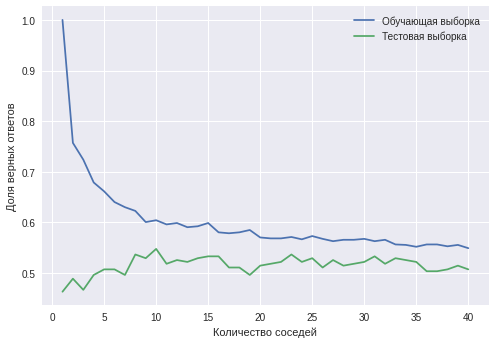

In [34]:
# создадим пустые словари для записи score и качества работы алгоритма
train_scores = {}
test_scores = {}

# для гиперпараметра от 0 до 40 включительно заполним словари данными
for n in range(1,41):
  clf = KNeighborsClassifier(n_neighbors=n)
  clf.fit(x_train1, y_train1)
  # запись качества на данной итерации в словари
  train_scores[n] = clf.score(x_train1, y_train1)
  test_scores[n] = clf.score(x_test1, y_test1)

# рисуем графики
plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


GridSearchCV – это очень мощный инструмент для автоматического подбирания параметров для моделей машинного обучения. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров. Важно отметить, что такой подход может быть весьма времязатратным.

Воспользуемся им для подбора гиперпараметров

In [35]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': np.arange(1, 41),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski',
               'seuclidean', 'mahalanobis'],
    'weights': ['uniform', 'distance' ]
}
clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1) # cv - кросс-валидация
# Теперь обучение. 
clf_grid.fit(train_matrix, target)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 2800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 550, in _fit
    **self.effective_metric_params_,
  File "sklearn/neighbors/_binary_tree.pxi", line 95

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=40), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [36]:
clf_grid.best_params_ # лучшие параметры определенные в ходе обучения

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'uniform'}

In [37]:
optimal_clf = KNeighborsClassifier(metric='manhattan', n_neighbors= 17, weights='uniform')
# Обучение.
optimal_clf.fit(x_train1,y_train1)
# проверка
pred_prob = optimal_clf.predict(x_test1)
# количество сделанных предсказаний
accuracy_score(y_test1,pred_prob)

0.5257352941176471

Результат заметно улучшился, но все равно остается низким

Попробуем оверсэмплинг или передискретизаацию несколькими методами: SMOTE и RandomOverSampler

https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn


In [ ]:
from imblearn.over_sampling import SMOTE
# передискретизация синтетического меньшинства 
smote = SMOTE()
x_sm, y_sm = smote.fit_resample(train_matrix, target)
x_sm.shape, y_sm.shape

((3462, 7), (3462,))

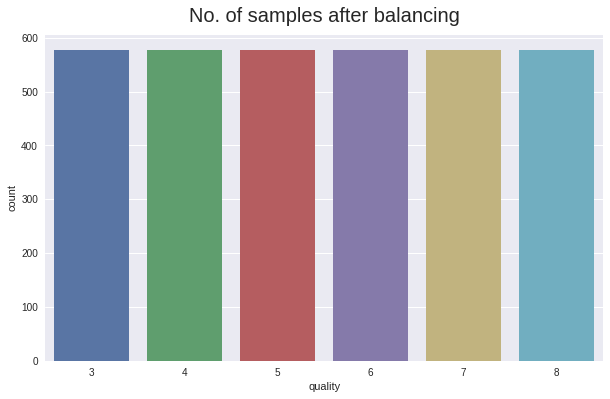

In [ ]:
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
plt.title("No. of samples after balancing", fontsize=20, y=1.02)
sns.countplot(x = y_sm)
plt.show()

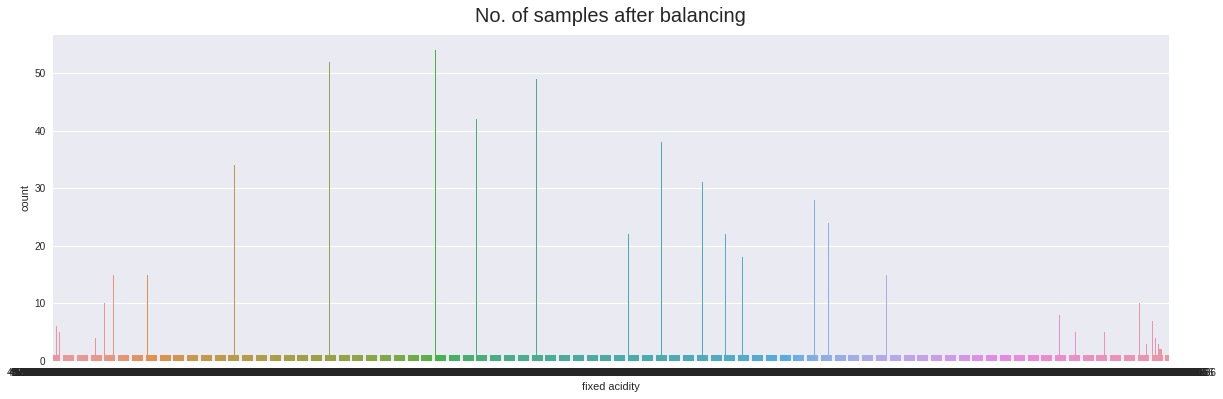

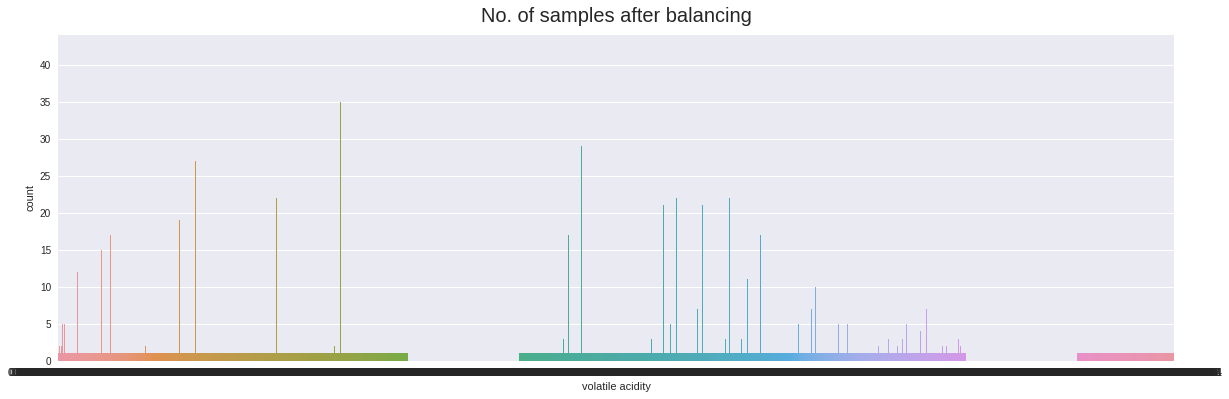

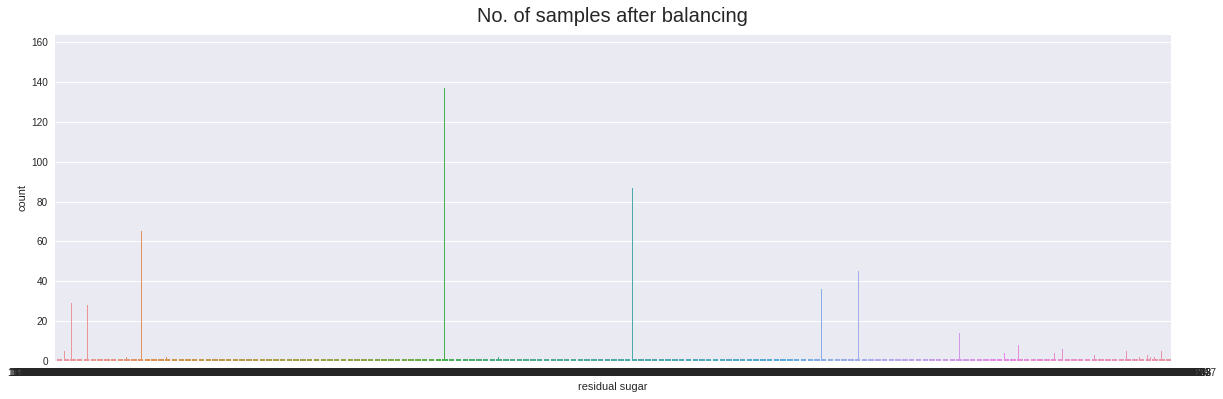

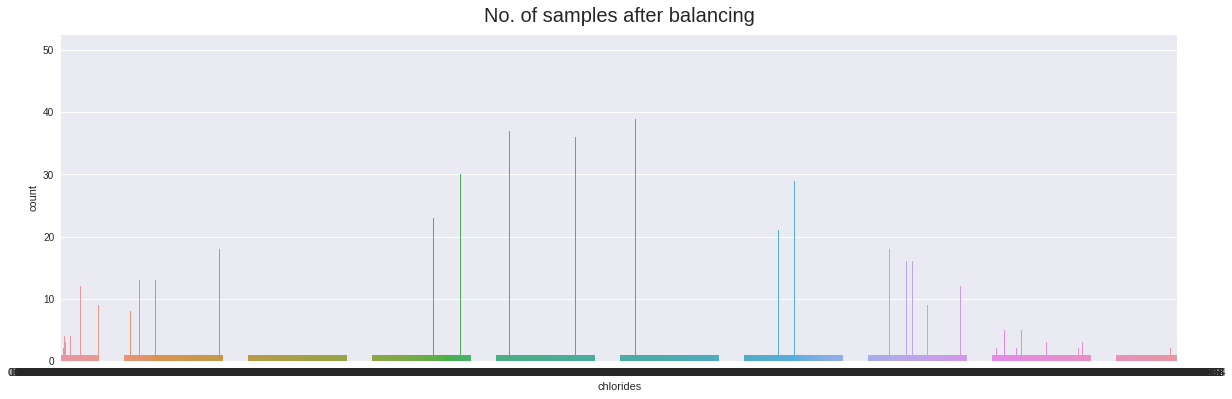

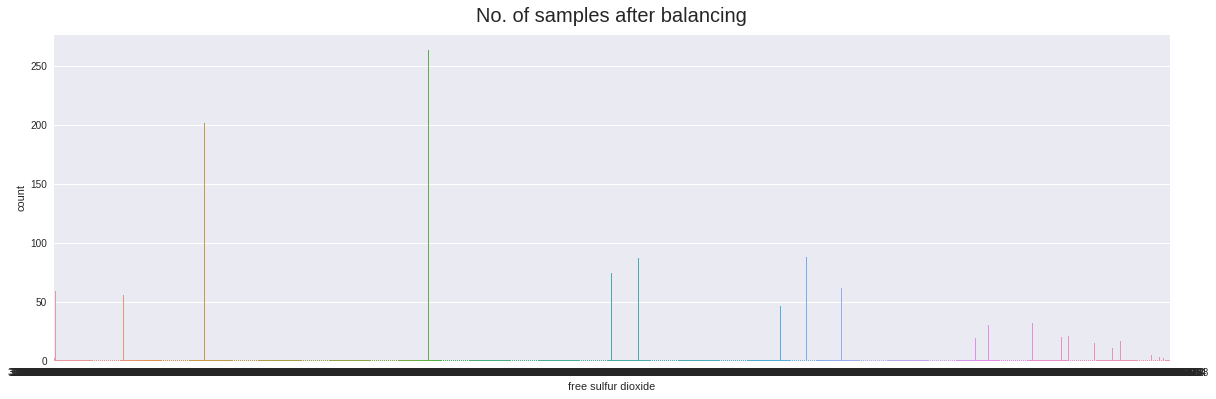

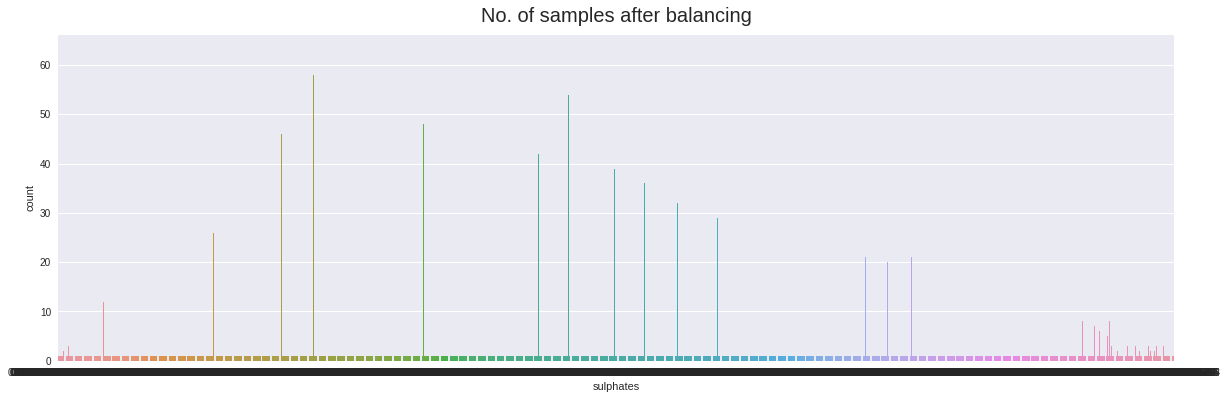

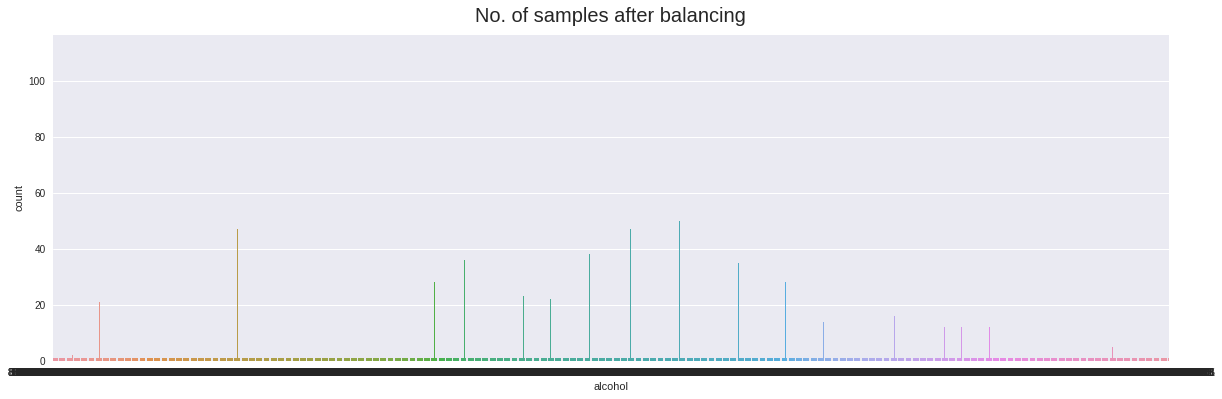

In [ ]:
for i in x_sm:
  # визуализация частоты классов нецелевых характеристик после балансировки
  plt.style.use("seaborn")
  plt.figure(figsize=(20,6))
  plt.title("No. of samples after balancing", fontsize=20, y=1.02)
  sns.countplot(x = x_sm[i])
  plt.show()

In [ ]:
x_trainSM, x_testSM, y_trainSM, y_testSM = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 42)

In [ ]:
len(x_trainSM), len(x_testSM)

(2769, 693)

In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(x_trainSM,y_trainSM)
y_pred_knn = knn.predict(x_testSM)
accuracy_score(y_testSM, y_pred_knn)

0.6984126984126984

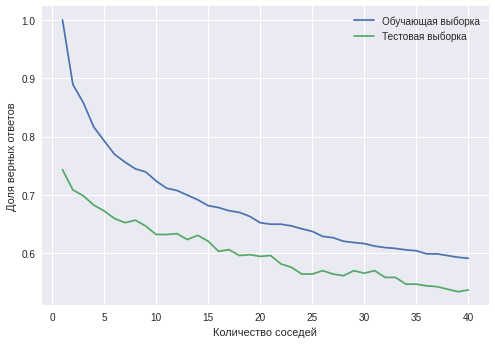

In [ ]:
# создадим пустые словари для записи score и качества работы алгоритма
train_scores = {}
test_scores = {}

# для гиперпараметра от 0 до 40 включительно заполним словари данными
for n in range(1,41):
  clf = KNeighborsClassifier(n_neighbors=n)
  clf.fit(x_trainSM, y_trainSM)
  # запись качества на данной итерации в словари
  train_scores[n] = clf.score(x_trainSM, y_trainSM)
  test_scores[n] = clf.score(x_testSM, y_testSM)

# рисуем графики
plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': np.arange(1, 41),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski',
               'seuclidean', 'mahalanobis'],
    'weights': ['uniform', 'distance' ]
}
clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1) # cv - кросс-валидация
# Теперь обучение. 
clf_grid.fit(x_sm, y_sm)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 2800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 550, in _fit
    **self.effective_metric_params_,
  File "sklearn/neighbors/_binary_tree.pxi", line 95

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=40), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
clf_grid.best_params_ # лучшие параметры определенные в ходе обучения

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
optimal_clf = KNeighborsClassifier(metric='manhattan', n_neighbors= 1, weights='uniform')
# Обучение.
optimal_clf.fit(x_trainSM,y_trainSM)
# проверка
pred_prob = optimal_clf.predict(x_testSM)
# количество сделанных предсказаний
accuracy_score(y_testSM,pred_prob)

0.7676767676767676

Результат уже выше 0.75.
Попробуем использовать оверсэмплер RandomOverSampler.

In [38]:
from imblearn.over_sampling import RandomOverSampler

over_samp =  RandomOverSampler(random_state=0) 
# Класс для выполнения случайной передискретизации. Нормализация классов путем случайного отбора выборок с заменой. 
X_train_res, Y_train_res = over_samp.fit_resample(train_matrix, target)
X_train_res.shape, Y_train_res.shape
# после обработки тестовая выборка стала состоять из 3462 строки

((3462, 7), (3462,))

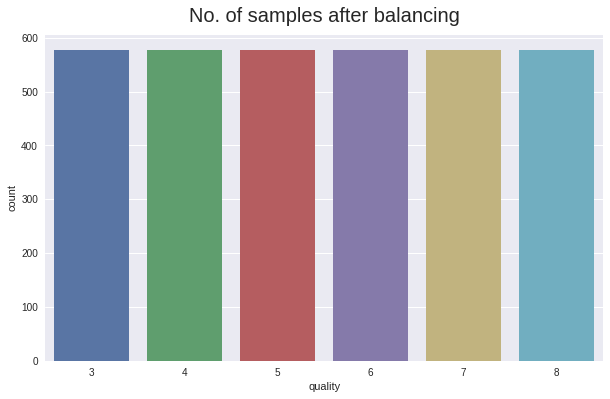

In [39]:
# визуализация частоты классов целевой характеристики после балансировки
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
plt.title("No. of samples after balancing", fontsize=20, y=1.02)
sns.countplot(x = Y_train_res)
plt.show()

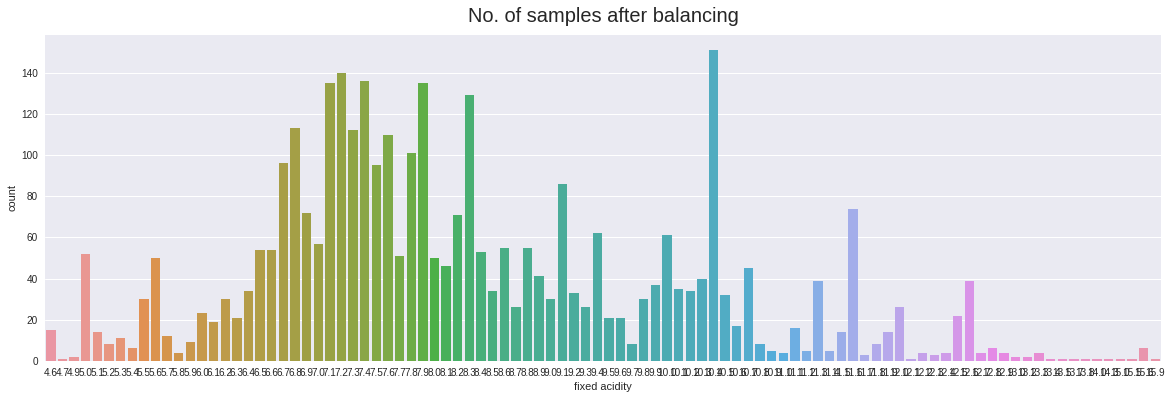

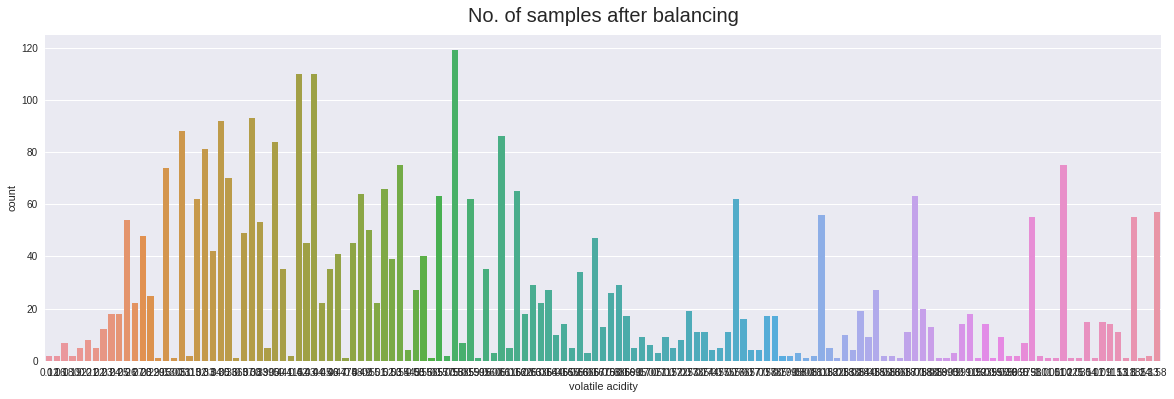

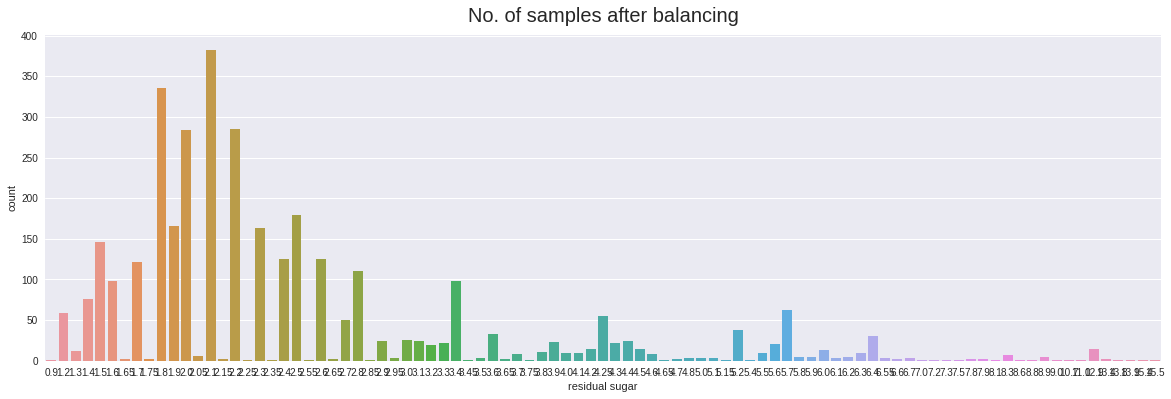

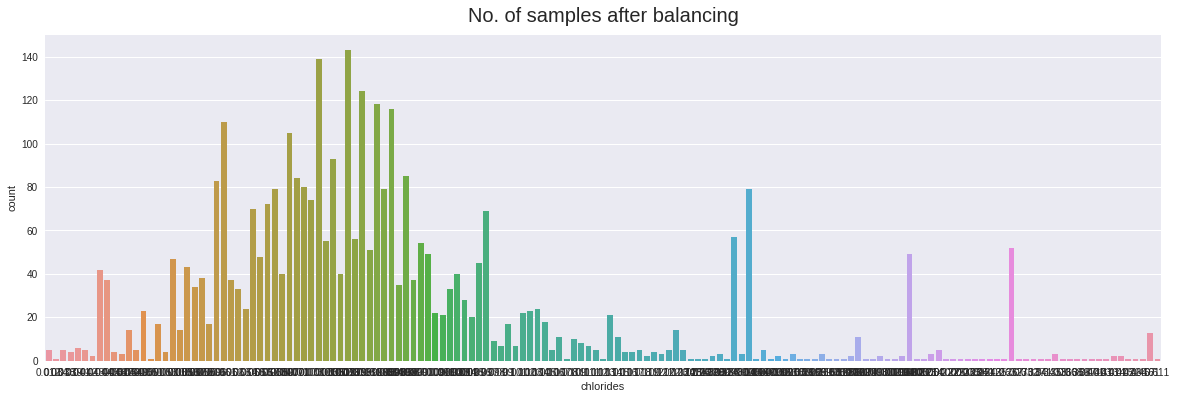

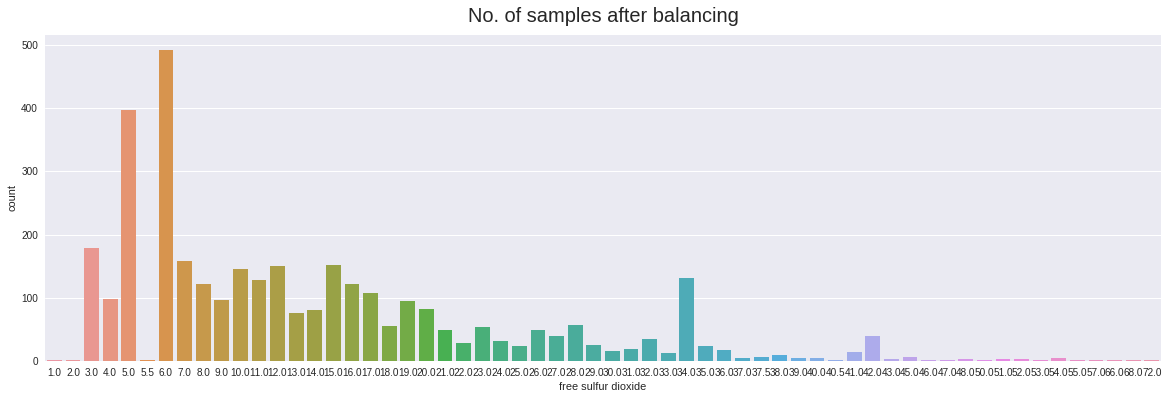

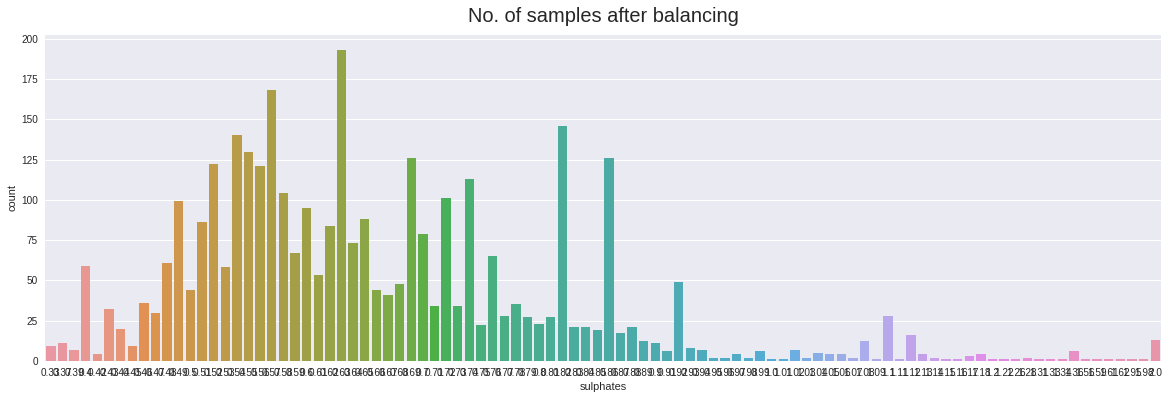

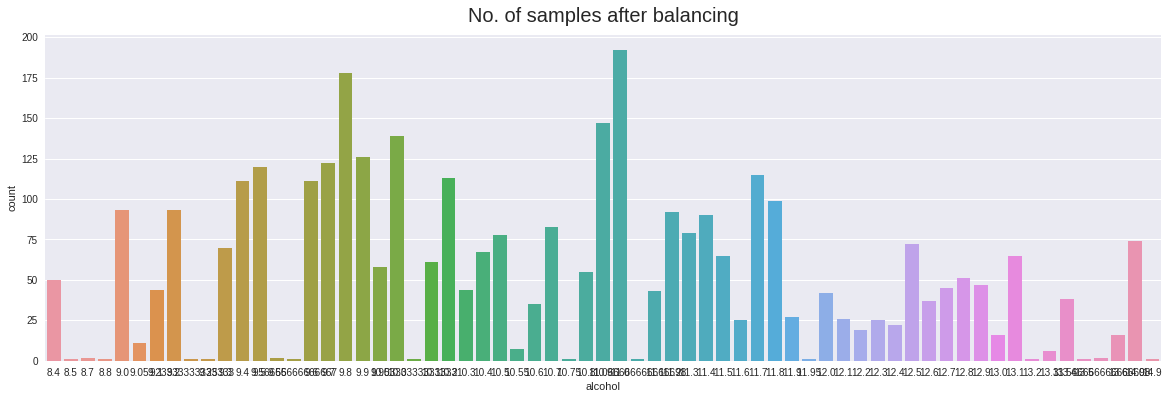

In [43]:
for i in X_train_res:
  # визуализация частоты классов нецелевых характеристик после балансировки
  plt.style.use("seaborn")
  plt.figure(figsize=(20,6))
  plt.title("No. of samples after balancing", fontsize=20, y=1.02)
  sns.countplot(x = X_train_res[i])
  plt.show()

In [44]:
x_trainROS, x_testROS, y_trainROS, y_testROS = train_test_split(X_train_res, Y_train_res, test_size = 0.2, random_state = 42)

In [45]:
len(x_trainROS), len(x_testROS)

(2769, 693)

In [46]:
knn = KNeighborsClassifier(3)
knn.fit(x_trainROS,y_trainROS)
y_pred_knn = knn.predict(x_testROS)
accuracy_score(y_testROS, y_pred_knn)

0.7619047619047619

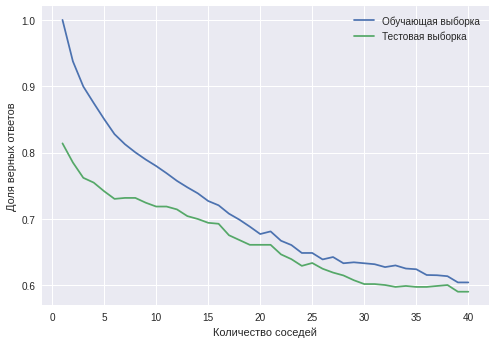

In [47]:
# создадим пустые словари для записи score и качества работы алгоритма
train_scores = {}
test_scores = {}

# для гиперпараметра от 0 до 40 включительно заполним словари данными
for n in range(1,41):
  clf = KNeighborsClassifier(n_neighbors=n)
  clf.fit(x_trainROS, y_trainROS)
  # запись качества на данной итерации в словари
  train_scores[n] = clf.score(x_trainROS, y_trainROS)
  test_scores[n] = clf.score(x_testROS, y_testROS)

# рисуем графики
plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


По графикам видно, что с увеличением гиперпараметра доля верных ответов немного уменьшается, и что графики идут рядом друг с другом не пересекаясь.
Таким образом мы можем сделать вывод об отсутствии переобучения.

In [48]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_neighbors': np.arange(1, 41),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski',
               'seuclidean', 'mahalanobis'],
    'weights': ['uniform', 'distance' ]
}
clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1) # cv - кросс-валидация
# Теперь обучение. 
clf_grid.fit(X_train_res, Y_train_res)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 2800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 550, in _fit
    **self.effective_metric_params_,
  File "sklearn/neighbors/_binary_tree.pxi", line 95

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=40), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [49]:
clf_grid.best_params_ # лучшие параметры определенные в ходе обучения

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

In [50]:
optimal_clf = KNeighborsClassifier(metric='euclidean', n_neighbors= 1, weights='uniform')
# Обучение.
optimal_clf.fit(x_trainROS,y_trainROS)
# проверка
pred_prob = optimal_clf.predict(x_testROS)
# количество сделанных предсказаний
accuracy_score(y_testROS,pred_prob)

0.8138528138528138

Результат уже достаточно неплох, выше 0.8
